In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib import gridspec
import cmath
import scipy as scipy
from mpl_toolkits.mplot3d import Axes3D
from plot_utils import save_fig
from matplotlib.colors import ListedColormap
import tikzplotlib
# plot settings
rc('axes', linewidth=3)
rc('text', usetex=True)
rc('font', size=24, family='arial', weight='bold')
rc('lines',linewidth=1.5,color='blue')
rc('xtick.major', pad=10, size=5, width=3)
rc('ytick.major', pad=10, size=5, width=3)

import math
def truncate(number, digits) -> float:
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1]) 
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [3]:
#df = pd.read_csv(r'./All_data.dat' , delimiter='  ', skip_blank_lines=True)
df ={}
Lx_list  = [4,8, 16, 32, 64]
for Lx in Lx_list:
    df_temp=pd.read_csv ("../02_DMRG/density_profiles_4_8_16_32_64/data_collected/collected_data_"+str(Lx),header=None)
    df_temp.sort_values(by=[0])
    df_temp=df_temp.transpose()
    df_temp.rename(columns=df_temp.iloc[0], inplace = True)
    df_temp.drop([0], inplace = True)
    df[Lx] = df_temp



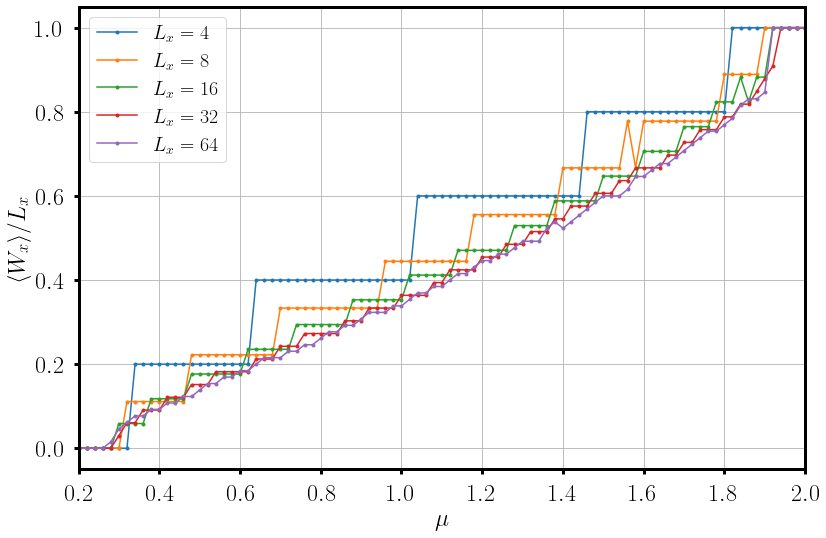

In [4]:
fig, ax1 = plt.subplots(1,figsize=(12,8))
w_x ={}
for Lx in Lx_list:
    w_x[Lx]=np.zeros(np.size(df[Lx].columns))
    for idx in np.arange(0,np.size(df[Lx].columns),1):
        w_x[Lx][idx]=np.sum(df[Lx][df[Lx].columns[idx]])
    
    plt.plot(df[Lx].columns,w_x[Lx]/(Lx+1),marker=".",label="$L_x="+str(Lx)+"$")

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\langle W_x\rangle/L_x$')
ax1.set_xlim([0.2,2.0])
ax1.set_ylim([ax1.get_ylim()[0],1.05])
plt.grid()
ax1.legend(fontsize=20)
save_fig("imgs/winding_mu.eps")

R² = 0.9978129655101705
mu0 = 0.269 (fit) mu0 = 0.268 (Lx64)


/tmp/ipykernel_83333/2292183722.py:3: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + mu0


0.0025

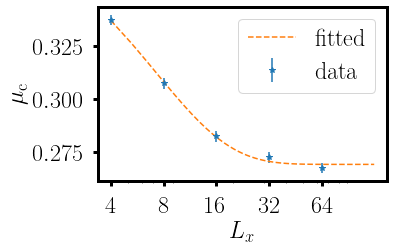

In [88]:
import scipy.optimize
def funExp(x, m, t, mu0):
    return m * np.exp(-t * x) + mu0


mu_c = np.zeros(np.size(Lx_list))
for i,Lx in enumerate(Lx_list):
    idx = np.where(w_x[Lx] < 0.1)[0][-1]
    mu_c[i] = df[Lx].columns[idx]

Lx_list = np.asarray(Lx_list)    
mu_c_dat = np.loadtxt("../02_DMRG/critical_point.dat",skiprows=1)[:,1]
mu_c=mu_c_dat
dmu_c = 0.0025
p0 = (1,1,0.28)

# fit exp
params, cv = scipy.optimize.curve_fit(funExp, Lx_list, mu_c, p0)
m, t, mu0 = params
# determine quality of the fit
squaredDiffs = np.square(mu_c - funExp(Lx_list, m, t, mu0))
squaredDiffsFromMean = np.square(mu_c - np.mean(mu_c))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

fig,ax = plt.subplots(1,1)
ax.errorbar(Lx_list,mu_c,yerr=dmu_c,fmt='*', label="data")
#ax.semilogx(Lx_list,mu_c,'*',label="data")
Lxs = np.linspace(Lx_list[0],128,100)
ax.semilogx(Lxs, funExp(Lxs, m, t, mu0), '--', label="fitted")
ax.set_ylabel("$\mu_\mathrm{c}$")
ax.set_xlabel("$L_x$")
ax.set_xticks([4,8,16,32,64])
ax.set_xticklabels([4,8,16,32,64])
plt.legend(loc=1)
save_fig("imgs/mu_critical.eps",strict=True)
print("mu0 = %.3f (fit) mu0 = %.3f (Lx64)"% (mu0,mu_c[-1]))
dmu_c

In [38]:
funExp(Lx, m, t, b)


0.26743469469372605

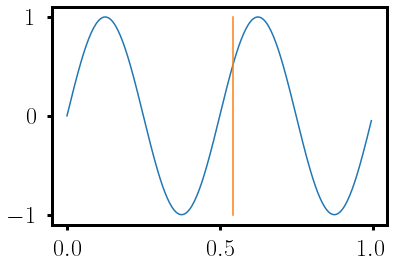

128.0

In [6]:
def extract_peak_frequency(data, sampling_rate):
    fft_data = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    
    peak_coefficient = np.argmax(np.abs(fft_data))
    peak_freq = freqs[peak_coefficient]
    
    return abs(peak_freq * sampling_rate)

N = 256
t = np.arange(N)/N

m = 2
nu = float(m)
f = np.sin(2*np.pi*nu*t)

ft = np.fft.fft(f)
freq = np.fft.fftfreq(N)

plt.plot(t, f )
#plt.xlim([-0.1,0.1])

fd = f[10:-10:2]
td = t[10:-10:2]
period = 1/(extract_peak_frequency(f,2)*len(fd))
plt.plot([period,period],[-1,1])
#plt.plot([1/nu,1/nu],[-1,1])
plt.show()
period
1/(td[2]-td[1])

In [6]:
mu_list = [0.313,1.3,1.91]
dfmu = {}
for mu in mu_list:
    dfmu[mu]=pd.read_csv("../02_DMRG/L_64/negative_lambda/obs_L_64_negative_Lambda/L64/mu"+str(mu)+"/result.cvs",delimiter="  ")


/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


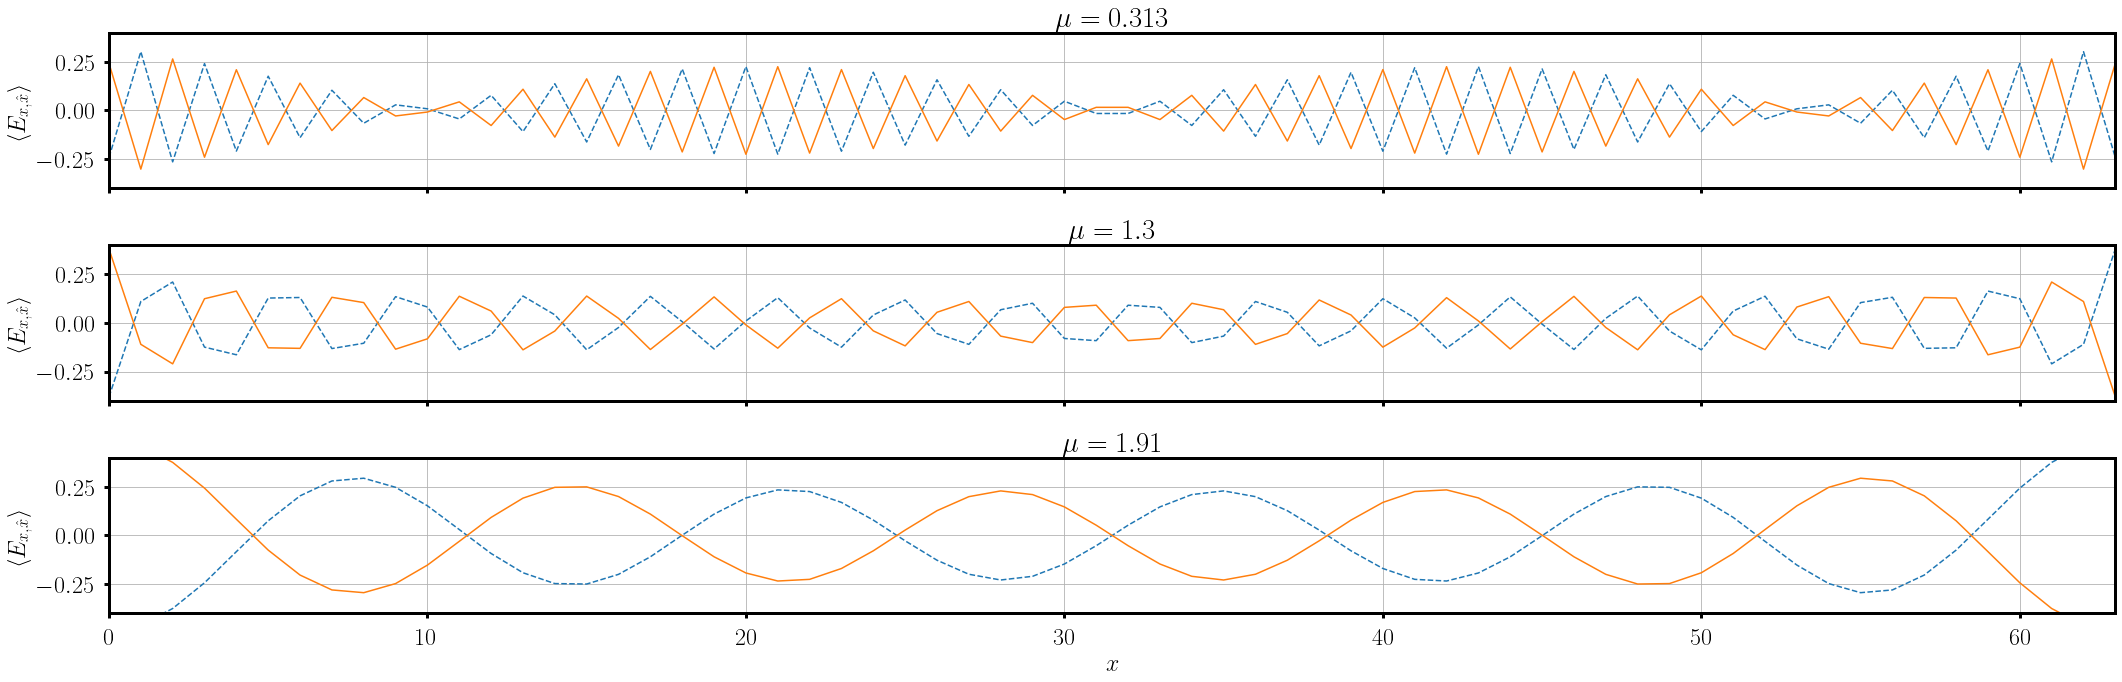

In [7]:

h = [0,0,0]
fig,ax = plt.subplots(3,1,sharex=True,figsize=(30,10))
#fig.suptitle('Electric Field')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
for i,mu in enumerate(mu_list):
    h[i]= ax[i].plot(dfmu[mu]["E_up"].values,'--')
    h[i]= ax[i].plot(dfmu[mu]["E_bot"].values)
    
    
    ax[i].set_title("$\mu="+str(mu)+"$")
    ax[i].set_ylabel("$\langle E_{x,\hat{x}} \\rangle$")

ax[2].set_xlabel("$x$")

for a in ax:
    a.set_xlim([0,63])
    a.set_ylim([-0.4,0.4])
    a.grid()


save_fig("imgs/electric_fields_negative_lambda.eps",strict=True)

In [8]:
Flipp_lattice_0_313 = np.column_stack([df_0_313["flipp_up"].values,df_0_313["flipp_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["flipp_up"].values,df_1_3["flipp_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["flipp_up"].values,df_1_91["flipp_bot"].values]).T

fig,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
fig.suptitle('Flippability')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
ax[0].pcolormesh(Flipp_lattice_0_313[:,:-1])
ax[0].axis("image")
ax[0].set_title("$\mu=0.313$")
#ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

ax[1].pcolormesh(Flipp_lattice_1_3[:,:-1])
ax[1].axis("image")
ax[1].set_title("$\mu=1.3$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
ax[2].pcolormesh(Flipp_lattice_1_91[:,:-1])
ax[2].axis("image")
ax[2].set_title("$\mu=1.91$")
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$y$")

NameError: name 'df_0_313' is not defined

10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
10000000000000.0
55.0


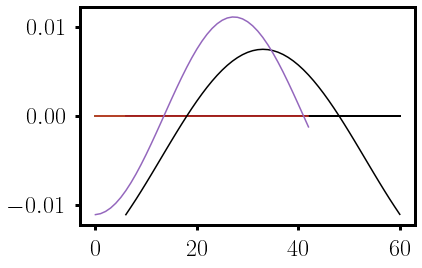

In [253]:
def compute_freq(signal, dt = 1):
    signal = signal - np.mean(signal)       # center signal to 0
    #signal = signal/np.max(np.abs(signal))  # normalize
    ft = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), dt) # Get frequency axis from the time axis
    mags = abs(ft)
    signal_freq = freqs[mags.argmax()] 
    inflection = np.diff(np.sign(np.diff(mags)))
    peaks = (inflection < 0).nonzero()[0] + 1
    peak = peaks[mags[peaks].argmax()]
    signal_freq = freqs[peak]
    phase = np.angle(ft[peak])/2
    if mags.max() >0.1: 
        return signal_freq,phase
    else: 
        return 1e-13,0
    
index_mu=[]
x_max=[]
lc = plt.rcParams['axes.prop_cycle'].by_key()['color']
for idx in df[64].columns:
    signal=df[64][idx][5:-5]
    lattice = np.arange(0,x.size)
    if idx <0.3:# and idx>0.26 :
        signal_freq, phase=compute_freq(signal,1)
        signal = signal - np.mean(signal)       # center signal to 0
        
        #signal = signal/np.max(np.abs(signal))  # normalize
        
        plt.plot(signal,'k')
        plt.plot(np.max(np.abs(signal))*np.sin(2*np.pi*signal_freq*lattice+phase))
        print(1/signal_freq)
        index_mu.append(idx)
        x_max.append(1/signal_freq)
    #x_max.append(extract_peak_frequency(signal))
    #print(x_max[-1])

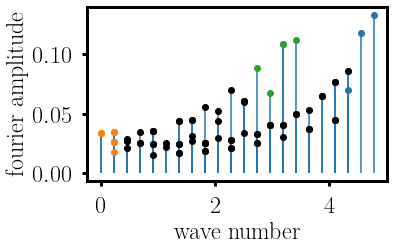

In [254]:
index_mu=[]
x_max=[]
lc = plt.rcParams['axes.prop_cycle'].by_key()['color']
for idx in df[64].columns:
    signal=df[64][idx][10:54]
    #print(extract_peak_frequency(signal))
    x=np.fft.fftshift(np.fft.fftfreq(len(signal),0.1),)[1:]
    y=np.abs(np.fft.fft(signal)[1:])
    max_y=np.max(y[x>=0])
    X_positive=x[x>=0]
    Y_positive=y[x>=0]
    #print(X_positive[Y_positive==max_y])
    index_mu.append(idx)
    xmax = X_positive[Y_positive==max_y]
    x_max.append(xmax)
    
    #plt.plot(np.fft.fftshift(np.fft.fftfreq(len(signal),0.1),)[1:], np.abs(np.fft.fft(signal)[1:]))
    if np.asarray(y).flatten()[0]< 0.8:
        #plt.stem(x[::2],y[::2],markerfmt=' ',basefmt= 'C0',)
        if max_y >0.001:
            if idx < 0.35:
                plt.stem(xmax,max_y,markerfmt='C0o',basefmt= 'C0')
            elif (1.26 < idx) and (idx < 1.44):
                plt.stem(xmax,max_y,markerfmt='C1o',basefmt= 'C0')
            elif (1.8 < idx):
                plt.stem(xmax,max_y,markerfmt='C2o',basefmt= 'C0')
            else: 
                plt.stem(xmax,max_y,markerfmt='ko',basefmt= 'C0',)
            
    
    #x_max.append(extract_peak_frequency(signal))
    #print(x_max[-1])

index_mu = np.asarray(index_mu)  
x_max = np.asarray(x_max)
idx_sort = np.argsort(index_mu)

plt.ylabel("fourier amplitude")
plt.xlabel("wave number")
mus_sort=index_mu[idx_sort]
x_max = x_max[idx_sort]
#plt.xlim([-0.1,5])
save_fig("imgs/frequencys.eps",strict=True)

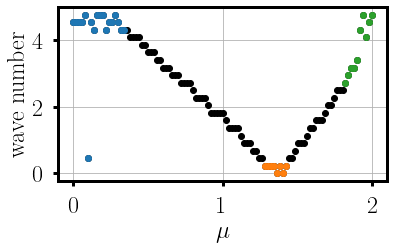

In [255]:


index_mu = np.asarray(index_mu)  
x_max = np.asarray(x_max)
idx_sort = np.argsort(index_mu)


h4 = plt.plot(mus_sort,x_max,'ko')

regime1 =  (mus_sort < 0.35)
h1=plt.plot(mus_sort[regime1],x_max[regime1],'o')

regime2 = (1.26 < mus_sort) & (mus_sort < 1.44)
h2=plt.plot(mus_sort[regime2],x_max[regime2],'o')

regime3 = mus_sort>1.8
h3=plt.plot(mus_sort[regime3],x_max[regime3],'o')

#plt.xlim([0.25,2])
plt.xlabel("$\mu$")
plt.ylabel("wave number")

xdata=np.asarray(index_mu).flatten()
ydata=np.asarray(x_max).flatten()

arr1inds = xdata.argsort()
xdata = xdata[arr1inds[::-1]]
ydata = ydata[arr1inds[::-1]]
plt.grid()
save_fig("imgs/structure_factor.eps",strict=True)


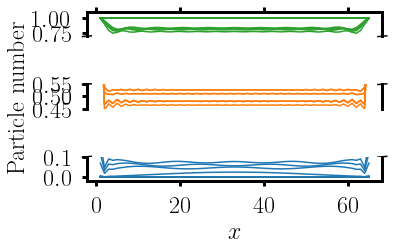

In [47]:


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2, ax3) = plt.subplots(3, 1)

# plot the same data on both axes
for idx in df[64].columns:
    #print(idx)
    if idx<0.35:
        ax3.plot(df[64][idx],label=r"$\mu=${}".format(idx),color=h1[0].get_color())
    if idx>1.26 and idx<1.44:
        ax2.plot(df[64][idx],label=r"$\mu=${}".format(idx),color=h2[0].get_color())
    if idx> 1.8:
        ax.plot(df[64][idx],label=r"$\mu=${}".format(idx),color=h3[0].get_color())
#ax.plot(pts)
#ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(0.7, 1.1)  # outliers only
ax3.set_ylim(-0.02, 0.1)  # outliers only
ax2.set_ylim(0.45, .55)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
#ax2.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off'  # labels along the bottom edge are off)
#)
ax.xaxis.tick_top()
#ax.tick_params(bottom='off',labelbottom="off")  # don't put tick labels at the top
ax3.xaxis.tick_bottom()
ax.tick_params(labelbottom=False)
ax.tick_params(labeltop=False)
ax2.tick_params(labelbottom=False)
ax2.xaxis.tick_bottom()
ax2.set_xticks([])
# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
plt.xlabel("$x$")
ax2.set_ylabel("Particle number")

save_fig("imgs/particle_number.eps",strict=True)
plt.show()

[0.01   0.02   0.03   0.04   0.05   0.06   0.07   0.08   0.09   0.1
 0.11   0.12   0.13   0.14   0.15   0.16   0.17   0.18   0.19   0.2
 0.21   0.22   0.23   0.24   0.25   0.26   0.27   0.28   0.281  0.282
 0.283  0.284  0.285  0.286  0.287  0.288  0.289  0.29   0.291  0.292
 0.293  0.294  0.295  0.296  0.297  0.298  0.299  0.3    0.301  0.302
 0.303  0.304  0.305  0.306  0.307  0.308  0.309  0.31   0.311  0.312
 0.313  0.314  0.315  0.316  0.317  0.318  0.319  0.35   0.4    0.45
 0.5    0.55   0.6    0.65   0.7    0.75   0.8    0.85   0.9    0.95
 1.     1.05   1.1    1.15   1.2    1.25   1.35   1.4    1.45   1.5
 1.55   1.6    1.65   1.7    1.75   1.8    1.8435 1.8475 1.85   1.8675
 1.8975 1.9    1.91   1.9295 1.93   1.935  1.95  ]


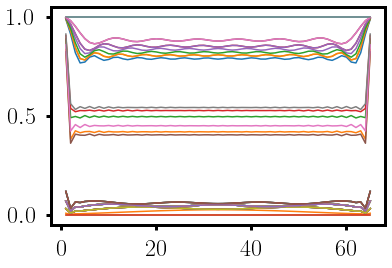

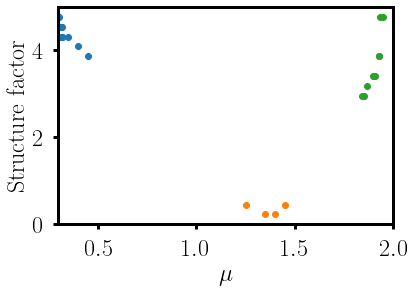